In [1]:
import pandas as pd
import numpy as np



In [3]:
data = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

In [4]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
data['intent'] = np.where(data['Rating']>=4,1,0)

In [7]:
senti_data = data[['Review Text','intent']]

In [8]:
senti_data.head()

,Review Text,intent
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [9]:
senti_data = senti_data.dropna(subset=['Review Text'])

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Bidirectional,LSTM,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(lower=True)

tokenizer.fit_on_texts(senti_data['Review Text'])

word_index = tokenizer.word_index

total_words= len(word_index)+1

print(f'total vocab size : {total_words}')


total vocab size : 14848


In [20]:
X = tokenizer.texts_to_sequences(senti_data['Review Text'])
X = pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)
y = senti_data['intent']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

In [22]:
MAX_NB_WORDS = total_words
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length = MAX_SEQUENCE_LENGTH))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs = 5

history = model.fit(X_train,Y_train,epochs=epochs,batch_size=64,validation_split=0.1)

Epoch 1/5
255/255 [==============================] - 21s 81ms/step - loss: 0.3670 - accuracy: 0.8421 - val_loss: 0.3097 - val_accuracy: 0.8675
Epoch 2/5
255/255 [==============================] - 20s 77ms/step - loss: 0.2299 - accuracy: 0.9086 - val_loss: 0.3628 - val_accuracy: 0.8664
Epoch 3/5
255/255 [==============================] - 20s 79ms/step - loss: 0.1893 - accuracy: 0.9256 - val_loss: 0.3646 - val_accuracy: 0.8587
Epoch 4/5
255/255 [==============================] - 19s 76ms/step - loss: 0.1396 - accuracy: 0.9479 - val_loss: 0.4403 - val_accuracy: 0.8565
Epoch 5/5
255/255 [==============================] - 20s 79ms/step - loss: 0.1089 - accuracy: 0.9588 - val_loss: 0.4531 - val_accuracy: 0.8499


In [23]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

142/142 [==============================] - 2s 17ms/step - loss: 0.4134 - accuracy: 0.8609
Test set
  Loss: 0.413
  Accuracy: 0.861


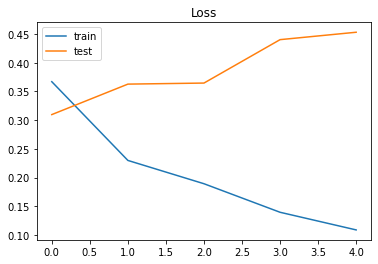

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

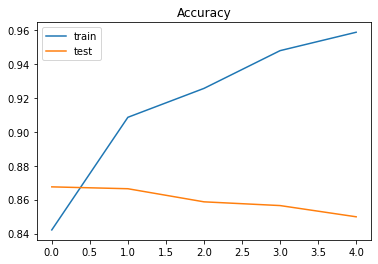

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();